## Problem 1, Implementing a Neural Net from Scratch

In [38]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [41]:
training_data = datasets.FashionMNIST(root="data", 
                                      train=True, 
                                      download=True, 
                                      transform=ToTensor())
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor())
labels_dict = {0:"T-shirt",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

In [67]:
selected_imgs = torch.zeros((10, 1, 28, 28))
# get data
dl = DataLoader(training_data, batch_size=1000, shuffle=True)
data_subset = next(iter(dl))
for i in range(10):
    while(1):
        imgs_labels = data_subset[1]
        all_label_i = np.where(imgs_labels == i)[0]
        if len(all_label_i): 
            idx = np.random.choice(all_label_i, 1)
            print(f"for label {i} found index {idx}")
            print(f"label is: {data_subset[1][idx]}")
            selected_imgs[i, ...] = data_subset[0][i].clone()
            break
        else:
            data_subset = next(iter(dl))

# plot sample data

for label 0 found index [241]
label is: tensor([0])
for label 1 found index [582]
label is: tensor([1])
for label 2 found index [353]
label is: tensor([2])
for label 3 found index [215]
label is: tensor([3])
for label 4 found index [429]
label is: tensor([4])
for label 5 found index [24]
label is: tensor([5])
for label 6 found index [570]
label is: tensor([6])
for label 7 found index [479]
label is: tensor([7])
for label 8 found index [628]
label is: tensor([8])
for label 9 found index [261]
label is: tensor([9])


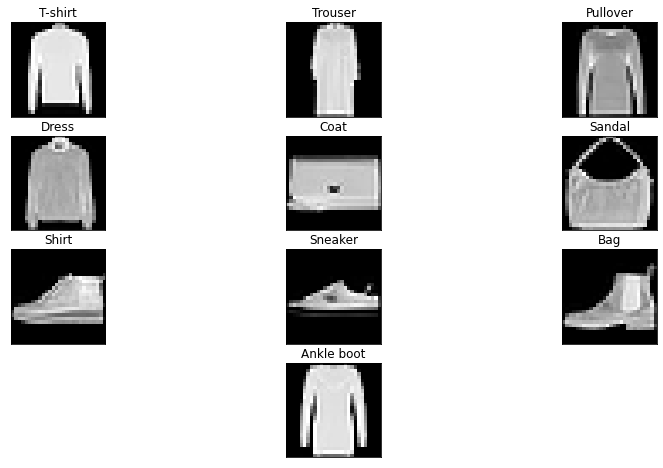

In [68]:
fig, ax = plt.subplots(4, 3, figsize=(14,8))
fig.delaxes(ax[3, 0])
fig.delaxes(ax[3, 2])
for i in range(10):
    ax[i//3,i%3].set_xticks([])
    ax[i//3,i%3].set_yticks([])
    ax[i//3,i%3].imshow(selected_imgs[i, 0], cmap='gray')
    ax[i//3,i%3].set_title(labels_dict[i])
ax[3,1].set_xticks([])
ax[3,1].set_yticks([])
ax[3,1].imshow(selected_imgs[9, 0], cmap='gray')
ax[3,1].set_title(labels_dict[i])

plt.show()